## Settings

### Packages

In [208]:
# Mathematics and Data manipulation
import pandas as pd
import numpy as np 
import ast
import re
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

### Importing data

In [3]:
DATA_FOLDER_PATH = "./data/MovieSummaries"
DATA_PATH = DATA_FOLDER_PATH + "/movie.metadata.tsv"

movie_headers = ['Weekipedia_ID', 'Freebase_ID', 'Name', 'Release_date', 
                 'Revenue', 'Runtime', 'Language', 'Countries', 'Genres']

movies = pd.read_csv(DATA_PATH, sep='\t', names=movie_headers)

### Cleaning data

In [4]:
movies['Release_year'] = movies['Release_date'].astype(str).str.extract(r'(\d{4})')
movies['Release_year'] = pd.to_numeric(movies['Release_year'])

In [5]:
def extract_words(column):
    return column.apply(ast.literal_eval).apply(lambda x: list(x.values()))


cleaning_columns = ['Language', 'Genres', 'Countries']

for column_name in cleaning_columns:
    movies[column_name+"_clean"] = extract_words(movies[column_name])

In [6]:
def clean_language(language_string):
    return re.sub(" Language", "", language_string)

movies.Language_clean = movies.Language_clean.apply(lambda lang_list: list(map(clean_language, lang_list)))

In [7]:
isHorrorMovie = movies['Genres_clean'].apply(lambda l: 'Horror' in l)
horror_df = movies[isHorrorMovie]

### Saving data

In [8]:
horror_df.to_csv(DATA_FOLDER_PATH + '/Horror_df.csv', index=False)

## Exploratory data analysis

In [9]:
horror_df.head(2)

,Weekipedia_ID,Freebase_ID,Name,Release_date,Revenue,Runtime,Language,Countries,Genres,Release_year,Language_clean,Genres_clean,Countries_clean
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,[English],"[Thriller, Science Fiction, Horror, Adventure,...",[United States of America]
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur...",1960.0,[English],"[Horror, Supernatural]",[United Kingdom]


### Subgenres

In [ ]:
# Counts of each associated genre
subgenres_counts = horror_df\
                    .Genres_clean\
                    .explode()\
                    .value_counts()

C:\Users\marco\AppData\Local\Temp\ipykernel_22292\539468276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(most_represented_subgenres, estimator="sum", errorbar=None, orient='h', palette=palette)


Text(0.5, 1.0, 'Top 10 genres appearances in horror movies')

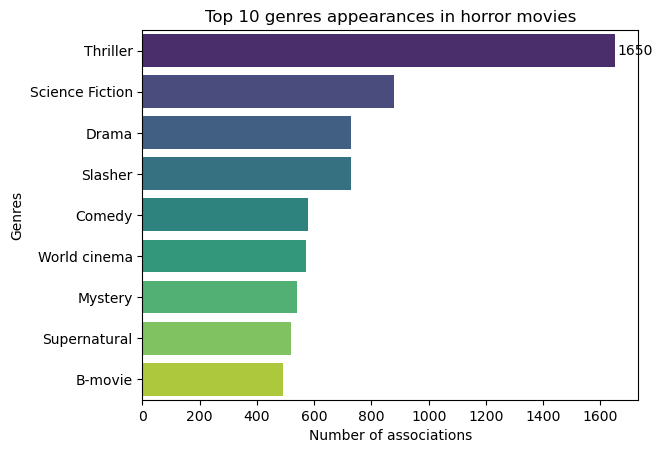

In [196]:
most_represented_subgenres = subgenres_counts[1:10]
palette = sns.color_palette("viridis", len(most_represented_subgenres))

ax = sns.barplot(most_represented_subgenres, estimator="sum", errorbar=None, orient='h', palette=palette)
ax.bar_label(ax.containers[0], padding=2)
plt.xlabel("Number of associations")
plt.ylabel("Genres")
plt.title("Top 10 genres appearances in horror movies")

### Countries

In [152]:
countries_counts = horror_df\
                    .Countries_clean\
                    .explode()\
                    .value_counts()

In [ ]:
country_coords = {
    "United States of America": (37.0902, -95.7129),
    "United Kingdom": (51.5074, -0.1278),
    "Canada": (56.1304, -106.3468),
    "Japan": (35.6762, 139.6503),
    "Italy": (41.9028, 12.4964),
    "Germany": (51.1657, 10.4515),
    "France": (48.8566, 2.3522),
    "India": (20.5937, 78.9629),
    "Spain": (40.4637, -3.7492),
    "South Korea": (36.5773, 127.0000),
    "Australia": (-25.2744, 133.7751),
    "Hong Kong": (22.3193, 114.1694),
    "Mexico": (23.6345, -102.5528),
    "New Zealand": (-40.9006, 174.8860),
    "Thailand": (15.8700, 100.9925),
    "Philippines": (12.8797, 121.7740),
    "West Germany": (51.1657, 10.4515), 
    "Sweden": (60.1282, 18.6435),
    "Netherlands": (52.3676, 4.9041),
    "Romania": (45.9432, 24.9668),
    "Cambodia": (12.5657, 104.9910),
    "Czech Republic": (49.8175, 15.4730),
    "Ireland": (53.1424, -7.6921),
    "South Africa": (-30.5595, 22.9375),
    "Argentina": (-38.4161, -63.6167),
    "Brazil": (-14.2350, -51.9253),
    "Belgium": (50.8503, 4.3517),
    "Norway": (60.4720, 8.4689),
    "China": (35.8617, 104.1954),
    "Denmark": (56.2639, 9.5018),
    "England": (51.5074, -0.1278),
    "Indonesia": (-0.7893, 113.9213),
    "Russia": (55.7558, 37.6173),
    "Yugoslavia": (44.0165, 21.0059),
    "Austria": (47.1625, 19.5033),
    "Malaysia": (4.2105, 101.9758),
    "Czechoslovakia": (49.8175, 15.4730),
    "Weimar Republic": (51.1657, 10.4515),
    "Finland": (61.9241, 25.7482),
    "Luxembourg": (49.6117, 6.13),
    "Turkey": (38.9637, 35.2433),
    "Poland": (51.9194, 19.1451),
    "Switzerland": (46.8182, 8.2275),
    "Hungary": (47.1625, 19.5033),
    "Singapore": (1.3521, 103.8198),
    "Greece": (39.0742, 21.8243),
    "Soviet Union": (56.2639, 9.5018), 
    "Bulgaria": (42.7339, 25.4858),
    "Taiwan": (23.6978, 120.9605),
    "Portugal": (38.7169, -9.1395),
    "Serbia": (44.8176, 20.4633),
    "Scotland": (56.4907, -4.2026),
    "Egypt": (26.8206, 30.8025),
    "Pakistan": (30.3753, 69.3451),
    "Croatia": (45.1, 15.2),
    "Wales": (52.1307, -3.7837),
    "Israel": (31.7680, 35.2137),
    "Chile": (-35.6751, -71.5430),
    "United Arab Emirates": (23.4241, 53.8478),
    "Cuba": (21.5218, -77.7812),
    "Peru": (-9.19, -75.0152),
    "Puerto Rico": (18.2208, -66.5901),
    "Iceland": (64.9631, -19.0208),
    "Slovakia": (48.6690, 19.6990),
    "Cameroon": (3.8480, 11.5021),
    "Azerbaijan": (40.1431, 47.5769),
    "Nepal": (28.3949, 84.1240),
    "Georgia": (42.3154, 43.3569),
    "Lithuania": (55.1694, 23.8813),
    "Colombia": (4.5709, -74.2973),
    "Ukraine": (48.3794, 31.1656),
    "Monaco": (43.7333, 7.4167),
    "Iran": (32.4279, 53.6880),
    "Uruguay": (-32.5228, -55.7658),
    "Bosnia and Herzegovina": (43.8486, 18.3564),
    "Slovak Republic": (48.6690, 19.6990),
    "Malta": (35.9375, 14.3754),
    "Morocco": (31.7917, -7.0926)
}

C:\Users\marco\AppData\Local\Temp\ipykernel_22292\4124392056.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map_file = gpd.datasets.get_path('naturalearth_lowres')


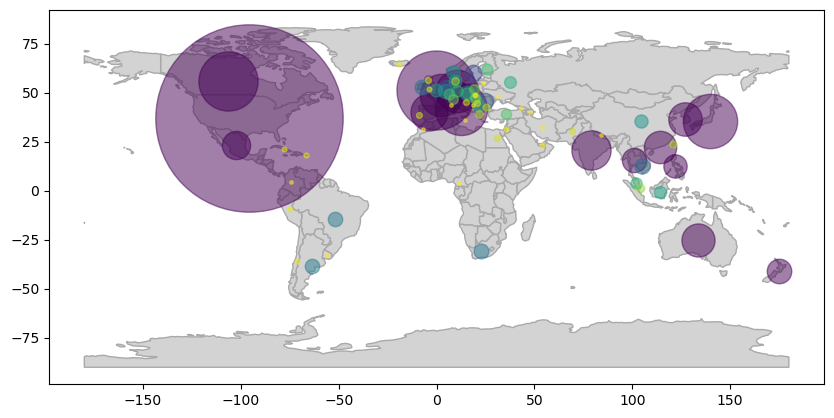

In [224]:
world_map_file = gpd.datasets.get_path('naturalearth_lowres')
world_map = gpd.read_file(world_map_file)

fig, axis = plt.subplots(figsize=(10, 10))
world_map.plot(ax=axis, color='lightgray', edgecolor='darkgray')

norm = mpl.colors.Normalize(vmin=np.min(countries_counts), vmax=np.max(countries_counts)/100)
cmap = plt.cm.viridis_r

for country, count in countries_counts.items():
    lat, lon = country_coords[country]
    axis.scatter(lon, lat, s=count*6, label=country, alpha=0.5, c=count, cmap=cmap, norm=norm)